# Project 2 Customer Segmentation Clustering based on Demographics and Behaviors

## Problem Description

For this project I intend to cluster customers based on their demographics and shopping behaviors. The real world use case for this type of project would be for ad campaign research. By grouping people together based on this information a company could potentially have better results with targetted ads for these groups. To do this I found a dataset on kaggle that included many features. For the scope of this project I have decided to reduce the number of features in the dataset. For this project I felt that the following features would be important for this exploration: 

ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Marital_Status_Absurd, Marital_Status_Alone, Marital_Status_Divorced, Marital_Status_Married, Marital_Status_Single, Marital_Status_Together, Marital_Status_Widow, Marital_Status_YOLO, Education_2n Cycle, Education_Basic, Education_Graduation, Education_Master, Education_PhD, Day, Month, Year.

Not all of the columns above where not all initially contained within the dataset, in order to eliminate the categorical features in the dataset. I applied 1hot encoding to the categorical values, this increased the number of features making the categorical data into numerous boolean type columns. I felt that this would be the proper technique as this is what we had done for the supervised learning problems. I believe that this will increase the effectiveness of the clustering. After preprocessing, I intend to explore a variety of preprocessing methods, Standard Scaler, Robust Scaler, Quantile Transformer, and Log Transfrom. Due to the number of features in the dataset I believe that utilizing these methods will allow for better clustering. In addition, I will be attempting to use two different types of feature reduction methods, t-SNE and PCA. To evaluate the models I intend to use a few different metrics, Silhouette Score, Davies Bouldin Scrore, and Calinski Harabasz Scrore. The primary metric I will be utilizing is the Silhouette Score however. I will be exploring three different unsupervised machine learning methods, K-Means Clustering, Hierarchical Clustering, and DBSCAN Clustering. I hope that these methods in combination with the variety of preprocessing methods I will be using will offer me strong insight into the dataset to help me better understand the real-world application of unsupervised machine learning in market strategies.

### Goals of Study

I would like to look into purchasing demographics and behaviors of shoppers and to utilize clustering to identify distinct purchasing patterns within unique groups that share demographic information in my dataset.

### Data Source

https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering/data



## Data Preparation

In [29]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Read in CSV
df = pd.read_csv('customer_segmentation.csv')
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [148]:
# Output dataframe before being processed.
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


The following two cells were used to gain a better understanding of the dataset.

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [150]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


For customer segmentation based on demographics I have decided to get rid of a few columns in the dataset. After reviewing the dataset I determined that these features don't add any necessary information for my exploration. 

In [31]:
drop_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
df.drop(columns=drop_columns, inplace=True, axis=1)
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3


In [32]:
cols = ""
for val in drop_columns:
    cols += val + ", "

print(cols)
cols = ""
print(df.columns)
for val in df.columns:
    cols += val + ", "    
print(cols)
print(len(df.columns))

AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Complain, Z_CostContact, Z_Revenue, Response, 
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')
ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, 
20


Getting rid of objects in dataset, this makes the dataset for clean and I can make all values in the dataset numeric. I believe that this will allow the model to understand the data beter. 

In [33]:
columns_to_1hot = ['Marital_Status', 'Education']
hot1_col = pd.get_dummies(df[columns_to_1hot])
encoded_df = pd.get_dummies(df[columns_to_1hot], columns=columns_to_1hot)
df = pd.concat([df.drop(columns_to_1hot, axis=1), encoded_df], axis=1)
df


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,5524,1957,58138.0,0,0,04-09-2012,58,635,88,546,...,False,True,False,False,False,False,False,True,False,False
1,2174,1954,46344.0,1,1,08-03-2014,38,11,1,6,...,False,True,False,False,False,False,False,True,False,False
2,4141,1965,71613.0,0,0,21-08-2013,26,426,49,127,...,False,False,True,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,10-02-2014,26,11,4,20,...,False,False,True,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,19-01-2014,94,173,43,118,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,13-06-2013,46,709,43,182,...,True,False,False,False,False,False,False,True,False,False
2236,4001,1946,64014.0,2,1,10-06-2014,56,406,0,30,...,False,False,True,False,False,False,False,False,False,True
2237,7270,1981,56981.0,0,0,25-01-2014,91,908,48,217,...,False,False,False,False,False,False,False,True,False,False
2238,8235,1956,69245.0,0,1,24-01-2014,8,428,30,214,...,False,False,True,False,False,False,False,False,True,False


The date format was causing issues in my dataset when I began creating models. I attempted to cast the date time object as a float but this created some problems as well. Someone online who did something very similar to what I am attempting to do here broke the date into three separate components and I felt that this was a good solution to my problem. After splitting the string, I created new columns to store each component of the string then removing the original column that housed the datetime format representation of the string.

In [34]:
broken_date = df['Dt_Customer'].str.split('-', n=3, expand=True)
df['Day'] = broken_date[0].astype(int)
df['Month'] = broken_date[1].astype(int)
df['Year'] = broken_date[2].astype(int)
df.drop('Dt_Customer', inplace=True, axis=1)
df

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Day,Month,Year
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,False,False,False,False,True,False,False,4,9,2012
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,False,False,False,False,True,False,False,8,3,2014
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,False,False,False,False,True,False,False,21,8,2013
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,False,False,False,False,True,False,False,10,2,2014
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,False,False,False,False,False,False,True,19,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,False,False,False,False,True,False,False,13,6,2013
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,False,False,False,False,False,False,True,10,6,2014
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,False,False,False,False,True,False,False,25,1,2014
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,False,False,False,False,False,True,False,24,1,2014


You can see in the above dataframe has string representations of the boolean values. As I had mentioned earlier I am attempting to create a dataframe that only consists of numeric values. In the following cell I cast the entire dataframe as type int. This will change the True/False representation of boolean values to 0/1.

In [35]:
df.dropna(inplace=True)
df = df.iloc[1:]        # Get rid of first colum in the dataset

In [36]:
df.astype(int)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Day,Month,Year
1,2174,1954,46344,1,1,38,11,1,6,2,...,0,0,0,0,1,0,0,8,3,2014
2,4141,1965,71613,0,0,26,426,49,127,111,...,0,0,0,0,1,0,0,21,8,2013
3,6182,1984,26646,1,0,26,11,4,20,10,...,0,0,0,0,1,0,0,10,2,2014
4,5324,1981,58293,1,0,94,173,43,118,46,...,0,0,0,0,0,0,1,19,1,2014
5,7446,1967,62513,0,1,16,520,42,98,0,...,0,0,0,0,0,1,0,9,9,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223,0,1,46,709,43,182,42,...,0,0,0,0,1,0,0,13,6,2013
2236,4001,1946,64014,2,1,56,406,0,30,0,...,0,0,0,0,0,0,1,10,6,2014
2237,7270,1981,56981,0,0,91,908,48,217,32,...,0,0,0,0,1,0,0,25,1,2014
2238,8235,1956,69245,0,1,8,428,30,214,80,...,0,0,0,0,0,1,0,24,1,2014


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 1 to 2239
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2239 non-null   int64  
 1   Year_Birth               2239 non-null   int64  
 2   Income                   2215 non-null   float64
 3   Kidhome                  2239 non-null   int64  
 4   Teenhome                 2239 non-null   int64  
 5   Recency                  2239 non-null   int64  
 6   MntWines                 2239 non-null   int64  
 7   MntFruits                2239 non-null   int64  
 8   MntMeatProducts          2239 non-null   int64  
 9   MntFishProducts          2239 non-null   int64  
 10  MntSweetProducts         2239 non-null   int64  
 11  MntGoldProds             2239 non-null   int64  
 12  NumDealsPurchases        2239 non-null   int64  
 13  NumWebPurchases          2239 non-null   int64  
 14  NumCatalogPurchases     

In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2239.0,5592.190264,3247.387146,0.0,2827.5,5455.0,8428.5,11191.0
Year_Birth,2239.0,1968.811076,11.984147,1893.0,1959.0,1970.0,1977.0,1996.0
Income,2215.0,52244.591874,25178.449611,1730.0,35284.0,51373.0,68557.0,666666.0
Kidhome,2239.0,0.444395,0.538436,0.0,0.0,0.0,1.0,2.0
Teenhome,2239.0,0.506476,0.544555,0.0,0.0,0.0,1.0,2.0
Recency,2239.0,49.105404,28.968313,0.0,24.0,49.0,74.0,99.0
MntWines,2239.0,303.787852,336.599812,0.0,23.5,173.0,504.0,1493.0
MntFruits,2239.0,26.274676,39.760926,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2239.0,166.780706,225.623504,0.0,16.0,67.0,231.5,1725.0
MntFishProducts,2239.0,37.465386,54.567161,0.0,3.0,12.0,50.0,259.0


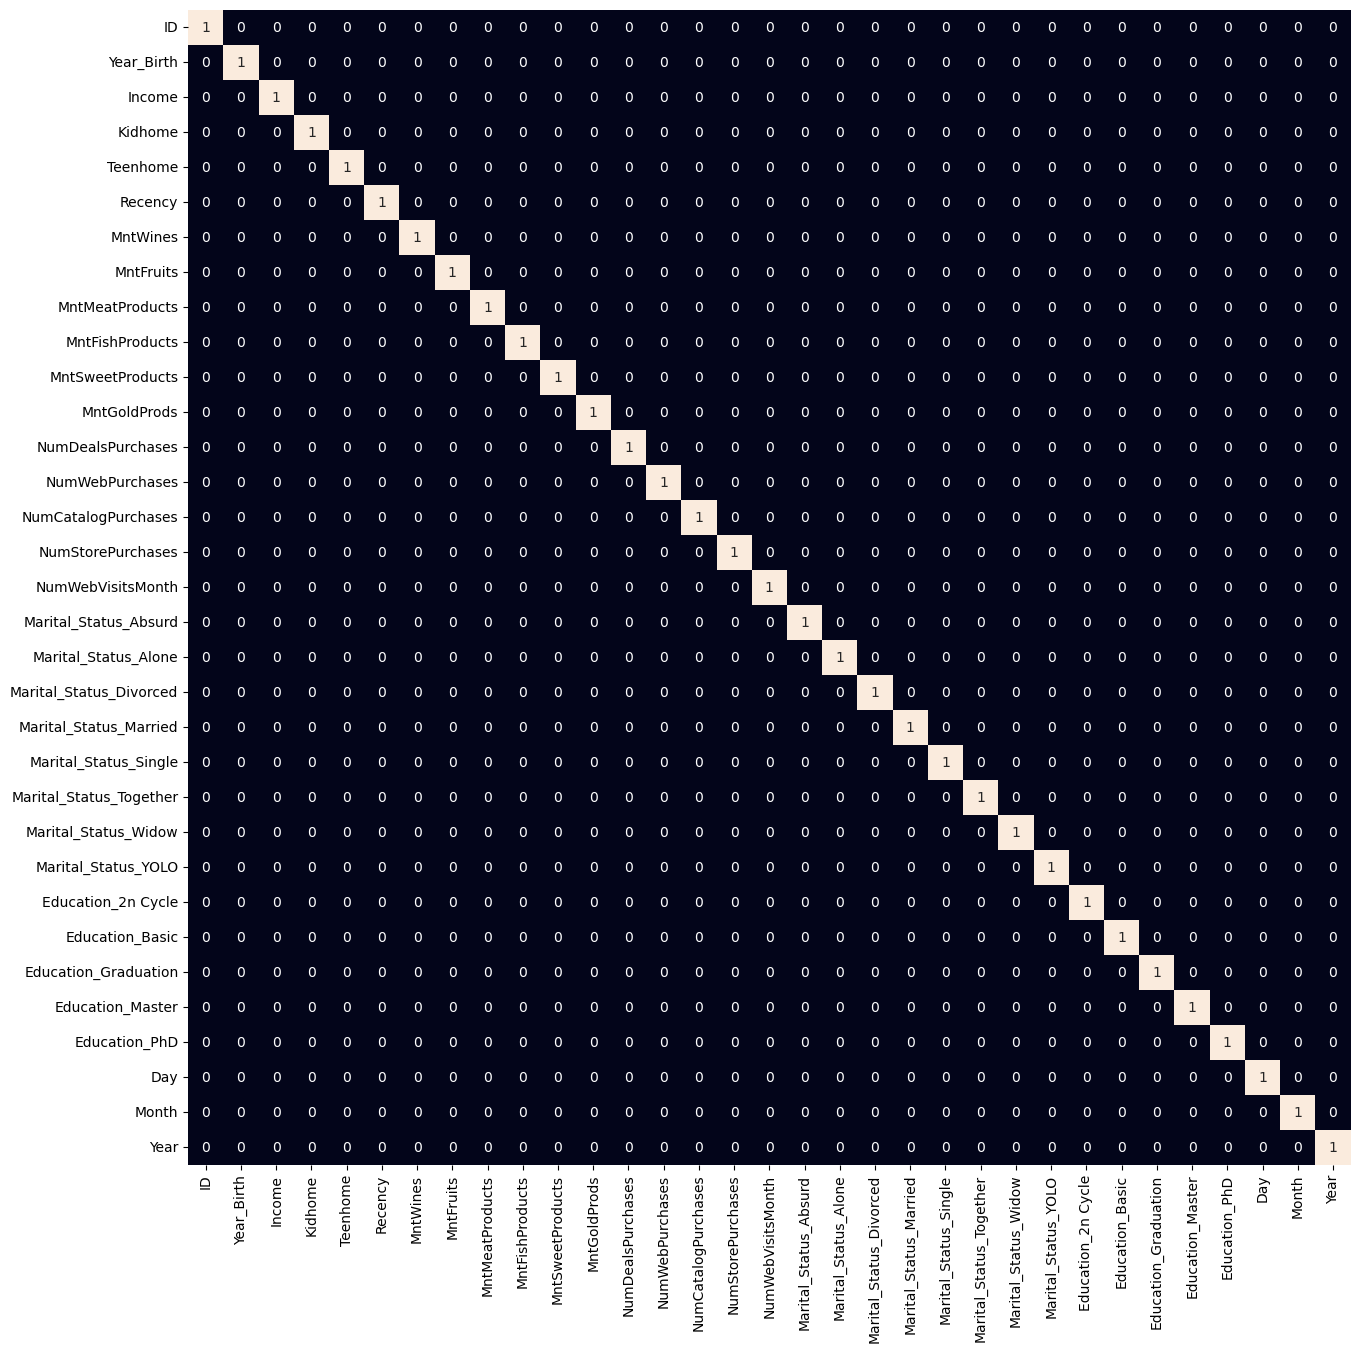

In [93]:
plt.figure(figsize=(15, 15))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()


In [354]:
print(len(df.columns))

33


## Training and Tuning Models

### Preprocessing Dataset with a variety of methods

In order to increase the effectiveness of my employed models, rather than just applying feature reduction I want to apply some preprocessing methods to make better clusters. The goal of this is to increase the silhouette scores of the models to acheive the best results. I tested these methods will all of the models that I used to see what preprocessing methods works best for each model.

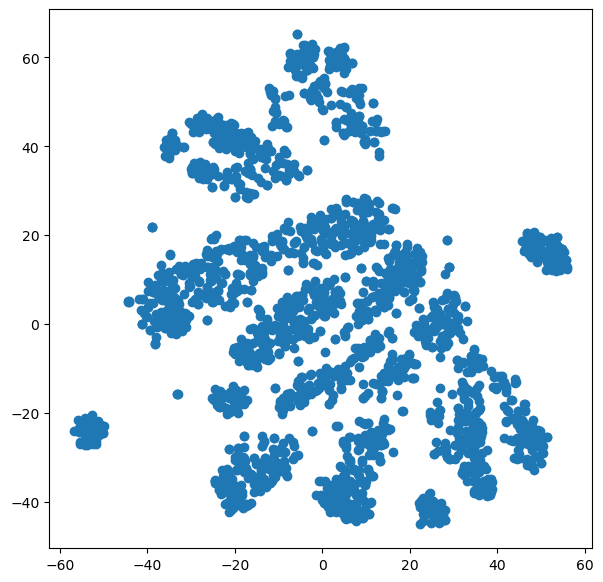

In [307]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)

model = TSNE(n_components=2, random_state=42)
tsne_data = model.fit_transform(scaled_data)

plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

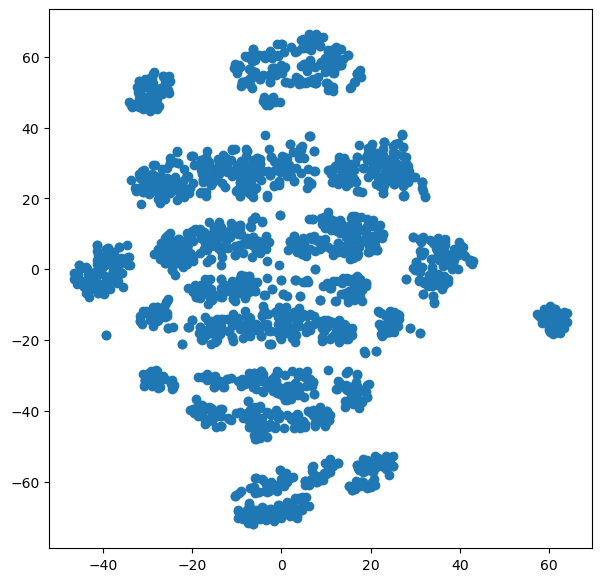

In [305]:
log_transformed_data = np.log1p(df)

scaler = StandardScaler()

scaled_data = scaler.fit_transform(log_transformed_data)
model = TSNE(n_components=2, random_state=42)
tsne_data = model.fit_transform(scaled_data)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

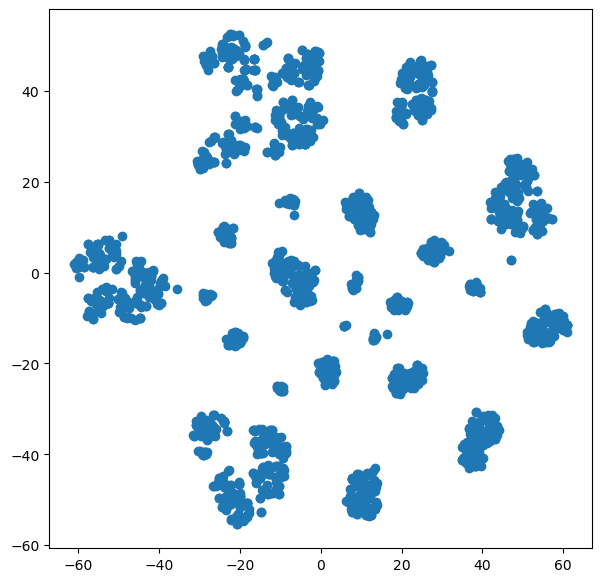

In [17]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='normal')

transformed_data = scaler.fit_transform(df)

model = TSNE(n_components=2, random_state=42)
tsne_data = model.fit_transform(transformed_data)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()



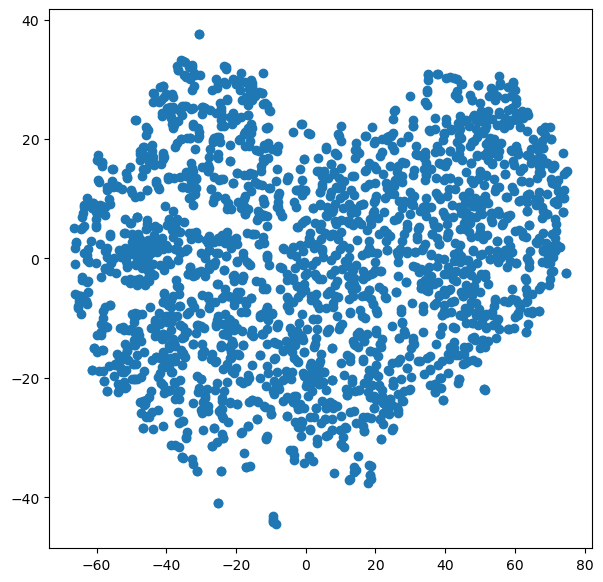

In [294]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaled_data = scaler.fit_transform(df)

model = TSNE(n_components=2, random_state=42)
tsne_data = model.fit_transform(scaled_data)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()


After attempting to use PCA for feature reduction (shown at the end) I decided to use TSNE instead. This proved to be much more useful, and clusters were much clearer.

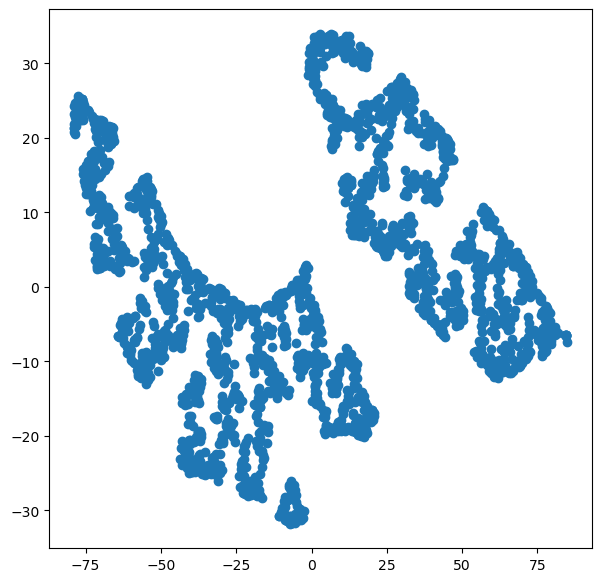

In [37]:
model = TSNE(n_components=2, random_state=42)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()


I wanted to test what values would work best for n_components and 2 appears to be the best value. The function would not allow me to exceed 3 and it would not allow me to choose 1. Based on the visualize of the data I believe that two will work better than three as there seems to be a more apparent shape.

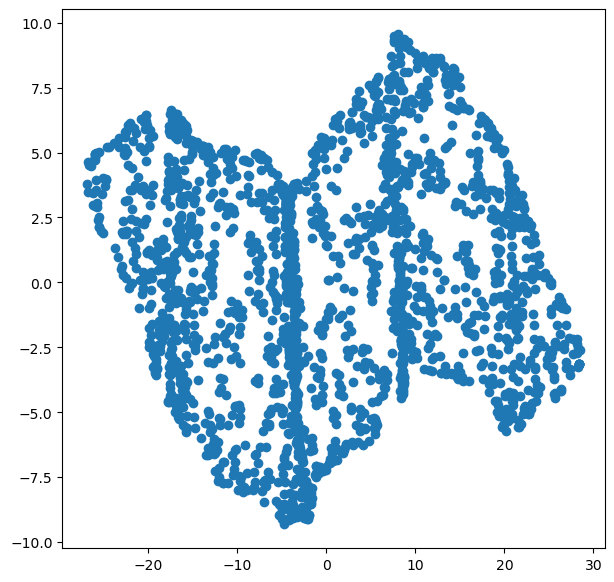

In [182]:
model = TSNE(n_components=3, random_state=42)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()


## K-Means Clustering

Initially I have chosen a random number of clusters to observe the output. Following this I will perform tuning on the K-Means model to find the optimal number of clusters.

I tested all of the preprocessing methods from above with this model and the best results came from the t-SNE feature reduction with no preprocessing methods.

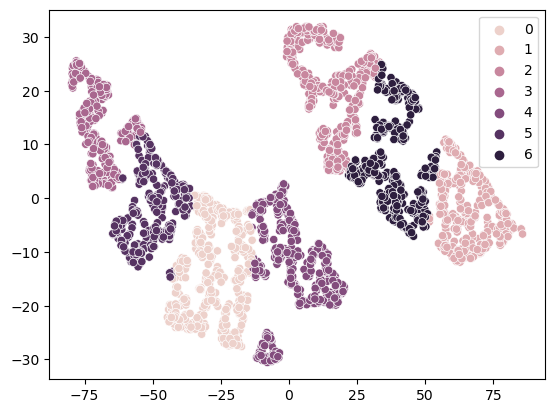

Silhouette Score: 0.44318566
Davies Bouldin Scrore: 0.7617686373773623
Calinski Harabasz Scrore: 5930.106380562909


In [342]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(tsne_data)
# segments = kmeans.fit_predict(df)
segments = kmeans.fit_predict(tsne_data)
sb.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=segments)
plt.show()

print("Silhouette Score: " + str(silhouette_score(tsne_data, kmeans.labels_)))
print("Davies Bouldin Scrore: " + str(davies_bouldin_score(tsne_data, kmeans.labels_)))
print("Calinski Harabasz Scrore: " + str(calinski_harabasz_score(tsne_data, kmeans.labels_)))



In [343]:
for cluster_label in range(7):
    cluster_indices = np.where(segments == cluster_label)[0] 
    cluster_data = df.iloc[cluster_indices] 
    cluster_attributes = cluster_data.mean()
    print(f"Cluster {cluster_label} Attributes:\n{cluster_attributes}\n")


Cluster 0 Attributes:
ID                          5177.772846
Year_Birth                  1970.746736
Income                     39029.801567
Kidhome                        0.806789
Teenhome                       0.550914
Recency                       49.281984
MntWines                      76.052219
MntFruits                      7.091384
MntMeatProducts               38.287206
MntFishProducts               11.023499
MntSweetProducts               7.099217
MntGoldProds                  23.430809
NumDealsPurchases              2.563969
NumWebPurchases                2.864230
NumCatalogPurchases            0.817232
NumStorePurchases              3.642298
NumWebVisitsMonth              6.535248
Marital_Status_Absurd          0.000000
Marital_Status_Alone           0.005222
Marital_Status_Divorced        0.112272
Marital_Status_Married         0.404700
Marital_Status_Single          0.211488
Marital_Status_Together        0.245431
Marital_Status_Widow           0.020888
Marital_Status_YOL

In the following code, I have used both the inertia values and the silhouette scores to visulize the results of the models. This will better help me determine what the optimal number of clusters will be for the model.

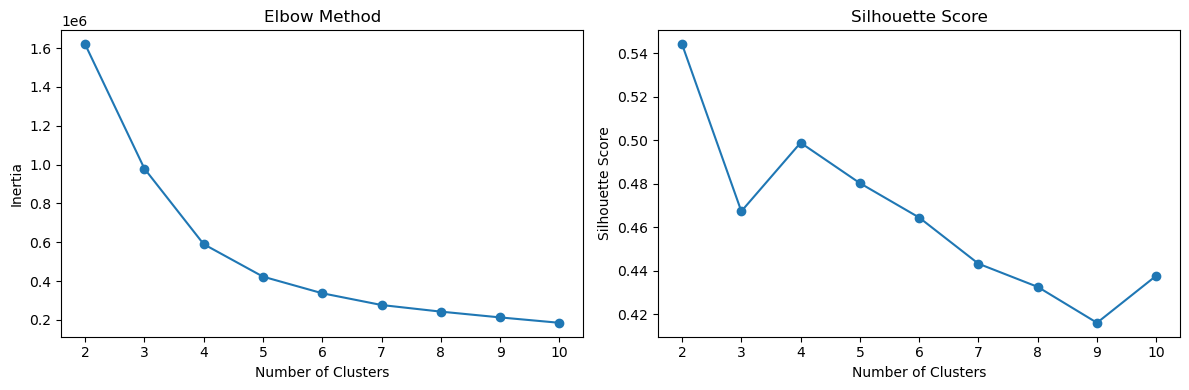

In [347]:
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(tsne_data, kmeans.labels_))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Based on the output of the two metrics I believe that four is the optimal number of clusters for the k-means model.

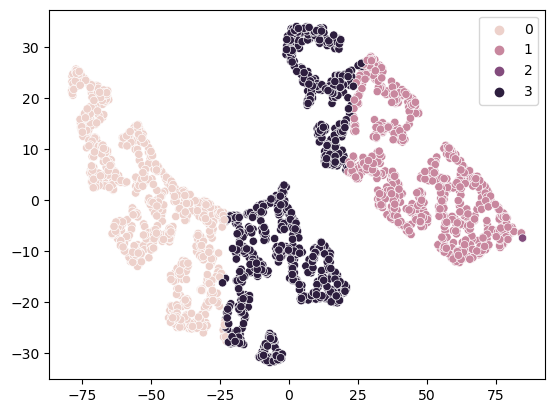

Silhouette Score: 0.3412893
Davies Bouldin Scrore: 0.7230759908784528
Calinski Harabasz Scrore: 2643.485648185008


In [38]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(tsne_data)
segments = kmeans.fit_predict(df)
sb.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=segments)
plt.show()

print("Silhouette Score: " + str(silhouette_score(tsne_data, kmeans.labels_)))
print("Davies Bouldin Scrore: " + str(davies_bouldin_score(tsne_data, kmeans.labels_)))
print("Calinski Harabasz Scrore: " + str(calinski_harabasz_score(tsne_data, kmeans.labels_)))



In [20]:
for cluster_label in range(4):
    cluster_indices = np.where(segments == cluster_label)[0] 
    cluster_data = df.iloc[cluster_indices] 
    cluster_attributes = cluster_data.mean()
    print(f"Cluster {cluster_label} Attributes:\n{cluster_attributes}\n")


Cluster 0 Attributes:
ID                          5662.222672
Year_Birth                  1973.105263
Income                     28348.147099
Kidhome                        0.808367
Teenhome                       0.311741
Recency                       48.561404
MntWines                      30.568151
MntFruits                      5.990553
MntMeatProducts               25.570850
MntFishProducts                9.068826
MntSweetProducts               6.056680
MntGoldProds                  17.715250
NumDealsPurchases              2.141700
NumWebPurchases                2.156545
NumCatalogPurchases            0.529015
NumStorePurchases              3.082321
NumWebVisitsMonth              6.908232
Marital_Status_Absurd          0.000000
Marital_Status_Alone           0.002699
Marital_Status_Divorced        0.091768
Marital_Status_Married         0.396761
Marital_Status_Single          0.234818
Marital_Status_Together        0.256410
Marital_Status_Widow           0.017544
Marital_Status_YOL

We see with the above model that there is strong clustering for 3 of the groups with one outlier on the far right hand side of the points, it is slightly darker than the rest.

In [349]:
for cluster_label in range(4):
    cluster_indices = np.where(segments == cluster_label)[0] 
    cluster_data = df.iloc[cluster_indices] 
    cluster_attributes = cluster_data.mean()
    print(f"Cluster {cluster_label} Attributes:\n{cluster_attributes}\n")


Cluster 0 Attributes:
ID                          5367.911877
Year_Birth                  1966.015326
Income                     52451.473819
Kidhome                        0.406130
Teenhome                       0.821201
Recency                       49.436782
MntWines                     293.473819
MntFruits                     18.899106
MntMeatProducts               99.090677
MntFishProducts               25.056194
MntSweetProducts              18.016603
MntGoldProds                  45.893997
NumDealsPurchases              3.123883
NumWebPurchases                4.771392
NumCatalogPurchases            2.259259
NumStorePurchases              6.120051
NumWebVisitsMonth              5.707535
Marital_Status_Absurd          0.000000
Marital_Status_Alone           0.001277
Marital_Status_Divorced        0.121328
Marital_Status_Married         0.375479
Marital_Status_Single          0.197957
Marital_Status_Together        0.257982
Marital_Status_Widow           0.043423
Marital_Status_YOL

Above are the results of each individual cluster, showing the grouping of the customer demographics.

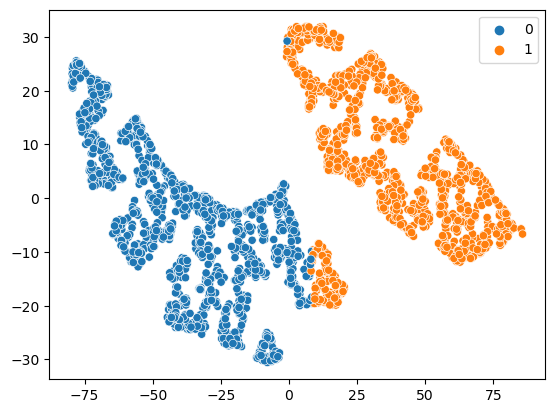

Silhouette Score: 0.5409229
Davies Bouldin Scrore: 0.6595576824943588
Calinski Harabasz Scrore: 4126.000649782117


In [350]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tsne_data)
segments = kmeans.fit_predict(df)
sb.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=segments)
plt.show()

print("Silhouette Score: " + str(silhouette_score(tsne_data, kmeans.labels_)))
print("Davies Bouldin Scrore: " + str(davies_bouldin_score(tsne_data, kmeans.labels_)))
print("Calinski Harabasz Scrore: " + str(calinski_harabasz_score(tsne_data, kmeans.labels_)))



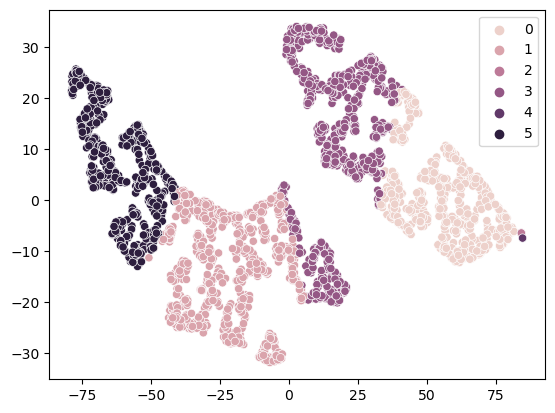

Silhouette Score: 0.3815953
Davies Bouldin Scrore: 0.6423638879384739
Calinski Harabasz Scrore: 2888.590298635879


In [39]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(tsne_data)
segments = kmeans.fit_predict(df)
sb.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=segments)
plt.show()

print("Silhouette Score: " + str(silhouette_score(tsne_data, kmeans.labels_)))
print("Davies Bouldin Scrore: " + str(davies_bouldin_score(tsne_data, kmeans.labels_)))
print("Calinski Harabasz Scrore: " + str(calinski_harabasz_score(tsne_data, kmeans.labels_)))



In [40]:
for cluster_label in range(6):
    cluster_indices = np.where(segments == cluster_label)[0] 
    cluster_data = df.iloc[cluster_indices] 
    cluster_attributes = cluster_data.mean()
    print(f"Cluster {cluster_label} Attributes:\n{cluster_attributes}\n")


Cluster 0 Attributes:
ID                          5652.952569
Year_Birth                  1967.683794
Income                     79251.719368
Kidhome                        0.075099
Teenhome                       0.266798
Recency                       49.719368
MntWines                     647.847826
MntFruits                     62.956522
MntMeatProducts              441.719368
MntFishProducts               91.047431
MntSweetProducts              68.213439
MntGoldProds                  74.796443
NumDealsPurchases              1.355731
NumWebPurchases                5.322134
NumCatalogPurchases            5.743083
NumStorePurchases              8.434783
NumWebVisitsMonth              2.863636
Marital_Status_Absurd          0.001976
Marital_Status_Alone           0.000000
Marital_Status_Divorced        0.106719
Marital_Status_Married         0.373518
Marital_Status_Single          0.223320
Marital_Status_Together        0.254941
Marital_Status_Widow           0.039526
Marital_Status_YOL

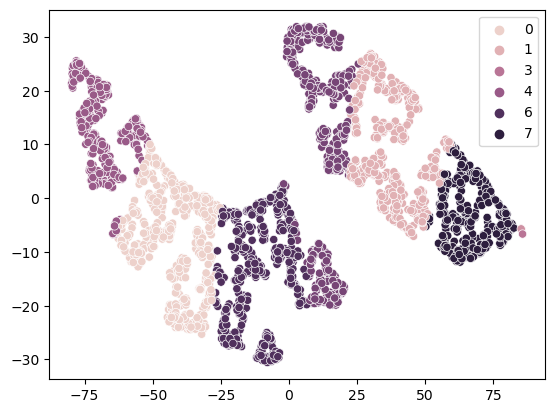

Silhouette Score: 0.34750888
Davies Bouldin Scrore: 0.774047418570059
Calinski Harabasz Scrore: 3320.1399265227124


In [352]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(tsne_data)
segments = kmeans.fit_predict(df)
sb.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=segments)
plt.show()

print("Silhouette Score: " + str(silhouette_score(tsne_data, kmeans.labels_)))
print("Davies Bouldin Scrore: " + str(davies_bouldin_score(tsne_data, kmeans.labels_)))
print("Calinski Harabasz Scrore: " + str(calinski_harabasz_score(tsne_data, kmeans.labels_)))


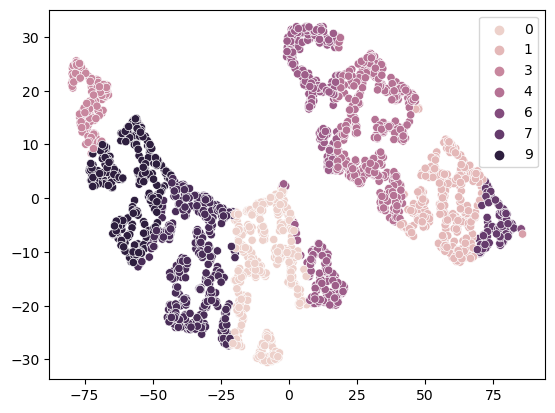

Silhouette Score: 0.31745118
Davies Bouldin Scrore: 0.8625352187004947
Calinski Harabasz Scrore: 3098.463740463896


In [353]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(tsne_data)
segments = kmeans.fit_predict(df)
sb.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=segments)
plt.show()

print("Silhouette Score: " + str(silhouette_score(tsne_data, kmeans.labels_)))
print("Davies Bouldin Scrore: " + str(davies_bouldin_score(tsne_data, kmeans.labels_)))
print("Calinski Harabasz Scrore: " + str(calinski_harabasz_score(tsne_data, kmeans.labels_)))


This continues to be a theme regardless of the number of clusters it seems to identify those two points as either one or two clusters as seen in the above outputs. The only case where this is untrue is when the number of clusters is 2.

## Hierarchical Clustering

Setting a baseline for clustering model. Tuning model will follow. We can see that there is some clear strong clustering in the sample.

For hierarchical clustering, I have employed Quantile Transformer for preprocessing the model as well as t-SNE feature reduction. This ended up being the best combination of preprocessing and feature reduction to achieve the highest silhouette score.

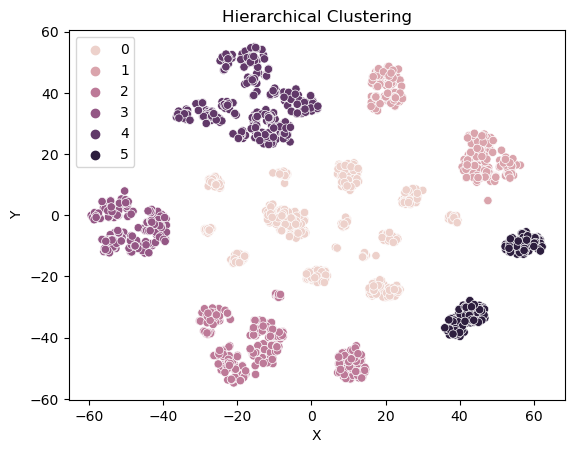

Silhouette Score: 0.48956448
Davies Bouldin Scrore: 0.7394380190774804
Calinski Harabasz Scrore: 2417.243733460098


In [313]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
hc.fit(tsne_data)
segments = hc.fit_predict(tsne_data)
labels = hc.labels_
sb.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=segments)
plt.title('Hierarchical Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("Silhouette Score: " + str(silhouette_score(tsne_data, hc.labels_)))
print("Davies Bouldin Scrore: " + str(davies_bouldin_score(tsne_data, hc.labels_)))
print("Calinski Harabasz Scrore: " + str(calinski_harabasz_score(tsne_data, hc.labels_)))


Using the silhouette score we can find the optimal paratmers for the tuning the model. In this case we can determine that four is a good amount of clusters for the model. 

0.6483471
21


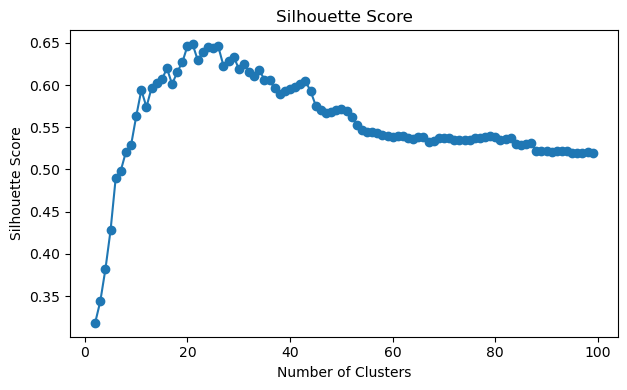

In [329]:
silhouette_scores = []
max_score = -1
optimal_clusters = 0
for k in range(2, 100):
    hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    hc.fit(tsne_data)
    sil_score = silhouette_score(tsne_data, hc.labels_)
    silhouette_scores.append(silhouette_score(tsne_data, hc.labels_))
    if sil_score > max_score:
        max_score = sil_score
        optimal_clusters = k


plt.figure(figsize=(12, 4))

print(max(silhouette_scores))
print(optimal_clusters)

plt.subplot(1, 2, 2)
plt.plot(range(2, 100), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

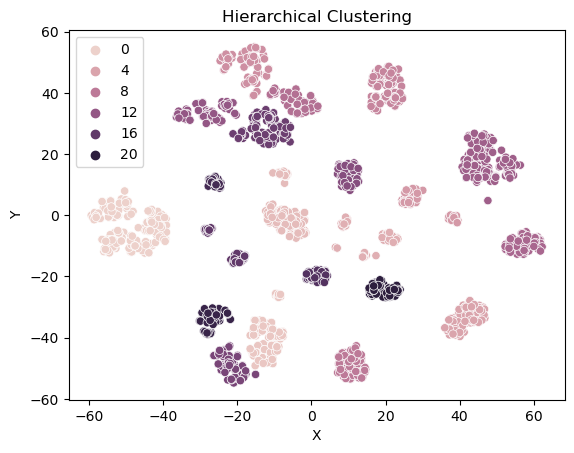

Silhouette Score: 0.6483471
Davies Bouldin Scrore: 0.5162681689905305
Calinski Harabasz Scrore: 6726.200560908927


In [330]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=21, affinity='euclidean', linkage='ward')
hc.fit(tsne_data)
segments = hc.fit_predict(tsne_data)
labels = hc.labels_
sb.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=segments)
plt.title('Hierarchical Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("Silhouette Score: " + str(silhouette_score(tsne_data, hc.labels_)))
print("Davies Bouldin Scrore: " + str(davies_bouldin_score(tsne_data, hc.labels_)))
print("Calinski Harabasz Scrore: " + str(calinski_harabasz_score(tsne_data, hc.labels_)))

In [332]:
for cluster_label in range(21):
    cluster_indices = np.where(segments == cluster_label)[0] 
    cluster_data = df.iloc[cluster_indices] 
    cluster_attributes = cluster_data.mean()
    print(f"Cluster {cluster_label} Attributes:\n{cluster_attributes}\n")

Cluster 0 Attributes:
ID                          5429.061224
Year_Birth                  1972.285714
Income                     51428.648980
Kidhome                        0.420408
Teenhome                       0.383673
Recency                       50.551020
MntWines                     265.689796
MntFruits                     33.583673
MntMeatProducts              191.138776
MntFishProducts               46.220408
MntSweetProducts              28.755102
MntGoldProds                  51.000000
NumDealsPurchases              2.232653
NumWebPurchases                3.914286
NumCatalogPurchases            2.783673
NumStorePurchases              5.726531
NumWebVisitsMonth              5.257143
Marital_Status_Absurd          0.004082
Marital_Status_Alone           0.000000
Marital_Status_Divorced        0.000000
Marital_Status_Married         0.000000
Marital_Status_Single          0.995918
Marital_Status_Together        0.000000
Marital_Status_Widow           0.000000
Marital_Status_YOL

After testing a variety of clusters, I have determined that 20 clusters is the best number of clusters to acheive the highest silhouette score, this ended up being the best model that I was able to produce.

## DBSCAN Clustering

Setting baseline for DBSCAN with arbitrary parameters.

Just as I had for hierarchical clustering, I am using Quantile Transformer for preprocessing and t-SNE for feature reduction. This yielded the best results for this sample.

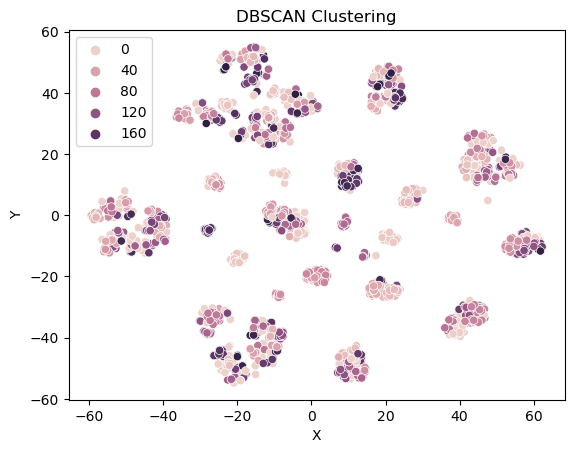

Silhouette Score: 0.42337513
Davies Bouldin Scrore: 1.6633434177403863
Calinski Harabasz Scrore: 82.94887658457228


In [333]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(tsne_data)
segments = dbscan.fit_predict(tsne_data)
labels = dbscan.labels_

sb.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=segments)
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("Silhouette Score: " + str(silhouette_score(tsne_data, dbscan.labels_)))
print("Davies Bouldin Scrore: " + str(davies_bouldin_score(tsne_data, dbscan.labels_)))
print("Calinski Harabasz Scrore: " + str(calinski_harabasz_score(tsne_data, dbscan.labels_)))

Observing how different the clusters are with DBSCAN compared to the previous two models used. After setting the baseline, we want to find the optimal parameters to run the model with for a better outcome.

In [334]:
eps_values = np.linspace(0.1, 2.0, 10)
min_samples_values = range(2, 10)

silhouette_scores = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        segments = dbscan.fit_predict(tsne_data)
        
        if len(set(segments)) > 1:
            score = silhouette_score(tsne_data, segments)
            silhouette_scores[(eps, min_samples)] = score
        else:
            silhouette_scores[(eps, min_samples)] = 0 

best_eps, best_min_samples = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[(best_eps, best_min_samples)]

print(f"Best parameters: eps={best_eps}, min_samples={best_min_samples}, Silhouette Score = {best_score}")

Best parameters: eps=2.0, min_samples=6, Silhouette Score = 0.5784975290298462


Based on the the brute force approach testing a range of parameters we can see that an epsilon of 2 and a minimum sample of 6 are the best two parameters to run the model with.

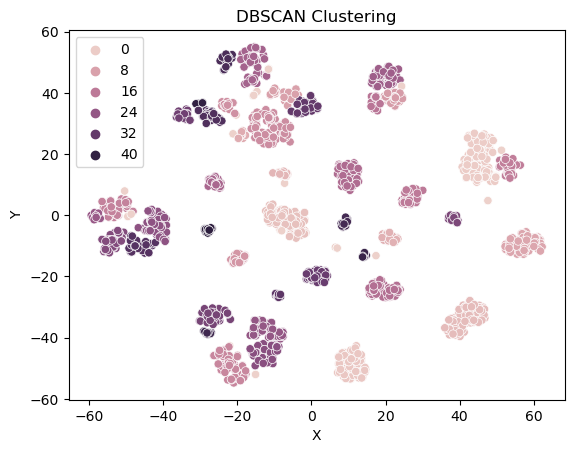

Silhouette Score: 0.5784975
Davies Bouldin Scrore: 1.8414349398299286
Calinski Harabasz Scrore: 2534.4592934389025


In [335]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=6)
segments = dbscan.fit_predict(tsne_data)

sb.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=segments)

plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("Silhouette Score: " + str(silhouette_score(tsne_data, dbscan.labels_)))
print("Davies Bouldin Scrore: " + str(davies_bouldin_score(tsne_data, dbscan.labels_)))
print("Calinski Harabasz Scrore: " + str(calinski_harabasz_score(tsne_data, dbscan.labels_)))

In [336]:
unique_segments = np.unique(segments)
for cluster_label in unique_segments:
    if cluster_label == -1:  # Handle noise points separately
        noise_indices = np.where(segments == cluster_label)[0]
        noise_data = tsne_data[noise_indices]
        print(f"Noise Points Attributes:\n{noise_data}\n")
    else:
        cluster_indices = np.where(segments == cluster_label)[0]
        cluster_data = df.iloc[cluster_indices]
        cluster_attributes = cluster_data.mean()
        print(f"Cluster {cluster_label} Attributes:\n{cluster_attributes}\n")

Noise Points Attributes:
[[-15.063571   -52.026733  ]
 [-22.031437   -42.68931   ]
 [ 17.426338   -13.196268  ]
 [ -7.23048     10.468654  ]
 [-11.595365    47.73677   ]
 [ 24.25106     42.137783  ]
 [ -8.498971    -4.7349553 ]
 [-11.508737    47.893436  ]
 [-11.542504    47.83811   ]
 [  6.9477677  -10.716195  ]
 [  6.8721123  -10.663712  ]
 [ 51.300785    21.24841   ]
 [-49.497135    -0.40317196]
 [ 24.334196    42.17277   ]
 [-14.780419    40.469784  ]
 [  6.4683676  -10.460006  ]
 [-11.5896      47.79586   ]
 [-14.712089    40.332844  ]
 [  6.9943495  -10.734682  ]
 [-21.12273     26.614614  ]
 [ -8.3918705   -4.7542515 ]
 [-48.96844      0.28408074]
 [ 24.337357    42.177467  ]
 [ 51.295902    21.247665  ]
 [-20.29188     32.773163  ]
 [-15.733238    39.078987  ]
 [-15.063747   -52.027035  ]
 [-49.538925    -0.38731867]
 [ -8.00764     -5.0663843 ]
 [-50.38998      7.939796  ]
 [-14.681213    40.44025   ]
 [-11.593656    47.73985   ]
 [-21.144228    26.622412  ]
 [  6.9611387  -10

Now that we have determined the optimal parameters to run the model with we want to find the attributes of the customers within the clusters.

## Failed Attempts

Before finding out about t-SNE I attempted to use PCA on the dataset to reduce the number of features. The results were very poor which resulted in me searching for a better solution to the problem.

### K-Means Clustering

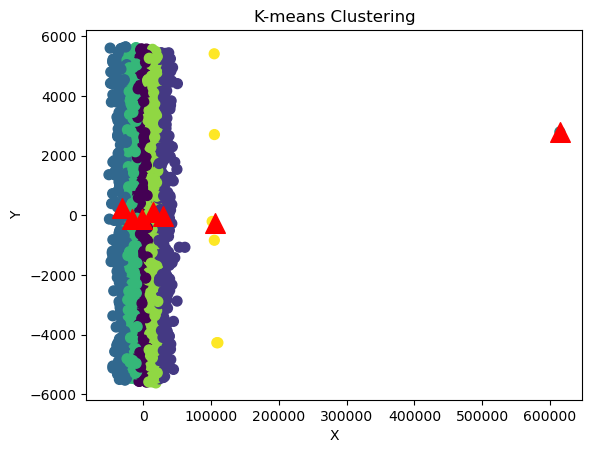

Silhouette Score: 0.3647165
Davies Bouldin Scrore: 0.7001751890146635
Calinski Harabasz Scrore: 3109.7416054926316


In [284]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=7, random_state=42)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.to_numpy())

kmeans.fit(df_pca)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=200, c='red')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("Silhouette Score: " + str(silhouette_score(tsne_data, kmeans.labels_)))
print("Davies Bouldin Scrore: " + str(davies_bouldin_score(tsne_data, kmeans.labels_)))
print("Calinski Harabasz Scrore: " + str(calinski_harabasz_score(tsne_data, kmeans.labels_)))

### Hierarchical Clustering

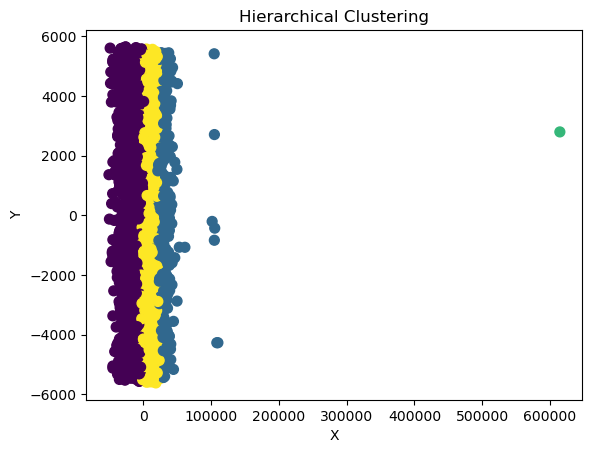

Silhouette Score: 0.478889085781948
Davies Bouldin Scrore: 0.4891754544925588
Calinski Harabasz Scrore: 3663.347157914578


In [285]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.to_numpy())

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc.fit(df_pca)
labels = hc.labels_

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, s=50, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("Silhouette Score: " + str(silhouette_score(df_pca, hc.labels_)))
print("Davies Bouldin Scrore: " + str(davies_bouldin_score(df_pca, hc.labels_)))
print("Calinski Harabasz Scrore: " + str(calinski_harabasz_score(df_pca, hc.labels_)))

### DBSCAN Clustering

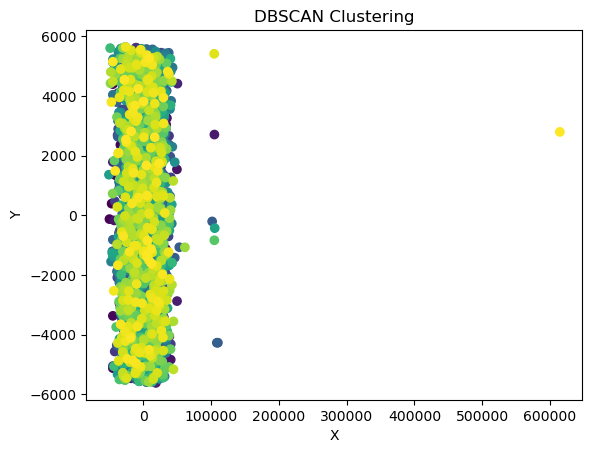

In [290]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.001, min_samples=1)
dbscan.fit(df_pca)
labels = dbscan.labels_

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.show()

## Conclusions

Based on the results we can see that Hierarchical clustering was my best performing model with the t-SNE feature reduction and Quantile Transformer preprocessing applied. The second best performing model was DBSCAN with t-SNE feature reduction and Quantile Transformer preprocessing applied. Lastly, the worst performing model was K-Means. Prior to using the preprocessing methods and just feature reduction K-Means was my best performing model. I found it interesting how the model's effectiveness changes when you apply different preprocessing methods.

I found this project very interesting, I felt that it went much better than my supervised machine learning project. I now can see why using this method would be effective in marketing, by grouping people based on their demographics and behaviors, companies would be able to create targeted marketing campaigns for these groups. From a technical aspect, the different things that you can do with the input data and the varying results was also very interesting. I was discouraged at first when I was using PCA because of how poor my results were but when employing different techniques there was a huge increase in the effectiveness of my models.

Overall, I learned a lot about unsupervised machine learning with this project. I felt that the work I put into all portions really gave me a much better understanding of unsupervised machine learning. Especially with how greatly my results differed with each new change that I introduced.